In [3]:
import pandas as pd
import pandas_datareader as dr
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S&P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].tolist()
sector = data_table[0]['GICS Sector'].tolist()
security = data_table[0]['Security'].tolist()
tickers = tickers[0:60]
sector = sector[0:60]
security = security[0:60]

In [42]:
print(len(tickers))
print(len(sector))
print(len(security))

60
60
60


In [12]:
prices_list=[]
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)
prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,159.426880,36.415054,51.917995,112.360001,109.415276,35.706703,103.480003,11.43,168.355179,9.999231,...,97.059998,47.790226,86.620239,34.687389,68.731857,76.180000,95.367126,791.460022,157.297501,65.182510
2017-01-04,159.668640,36.704132,52.650063,115.739998,109.678337,36.408356,104.139999,11.43,169.736740,9.913476,...,101.730003,48.394012,87.512932,34.485817,69.119080,77.519997,95.514565,793.039978,157.947693,67.041145
2017-01-05,159.122437,37.021187,53.049370,114.809998,108.034195,36.973591,105.910004,11.24,169.618347,9.784841,...,101.940002,48.503780,87.549744,34.389057,68.777946,76.930000,94.943260,792.000000,158.909500,66.381317
2017-01-06,159.588043,38.028313,53.066010,115.419998,109.264946,36.944351,108.300003,11.32,167.397919,10.136443,...,101.279999,48.613564,88.332031,33.703892,68.381516,79.300003,95.007774,792.909973,160.307739,67.282776
2017-01-09,158.728455,37.991024,53.415398,117.110001,108.043587,36.739704,108.570000,11.49,167.299271,9.887748,...,99.519997,47.936604,86.611023,33.279732,67.496437,79.589996,94.418060,790.340027,157.831848,67.431473


In [14]:
df = prices_df.pct_change().iloc[1:].T
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25
MMM,0.001516,-0.003421,0.002926,-0.005386,-0.003892,0.007419,-0.002530,-0.000282,-0.000733,0.006939,...,0.013781,-0.011219,0.017650,0.016931,-0.016417,-0.048304,0.006073,-0.017433,0.005705,-0.000935
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001340,-0.008763,0.005157,-0.000733,-0.003423,...,0.009456,0.008421,-0.008257,0.009082,0.001875,-0.008516,-0.010854,-0.019752,-0.017619,0.025069
ABBV,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.008807,0.004641,-0.012430,-0.001671,0.005355,-0.011320,-0.005500,-0.016479,-0.014115,0.003725
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,0.021982,0.012550,-0.017015,0.006304,-0.040088,0.002980,0.011773,-0.033012,0.009073,0.015126
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002928,0.010105,-0.007866,-0.000690,...,0.017294,0.005736,-0.003247,-0.010860,-0.002703,-0.009611,0.012868,-0.026465,-0.070366,0.000979


In [16]:
companies = list(df.index)
companies[:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

In [26]:
movements = df.values
normalizer = Normalizer()
array_norm = normalizer.fit_transform(df)
df_norm = pd.DataFrame(array_norm,columns=df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25
MMM,0.002949,-0.006654,0.005691,-0.010476,-0.007571,0.014429,-0.004920,-0.000548,-0.001426,0.013496,...,0.026804,-0.021822,0.034330,0.032931,-0.031932,-0.093953,0.011813,-0.033907,0.011096,-0.001819
ABT,0.015859,0.017257,0.054347,-0.001959,0.026970,0.002678,-0.017507,0.010303,-0.001464,-0.006838,...,0.018890,0.016823,-0.016495,0.018144,0.003746,-0.017013,-0.021684,-0.039460,-0.035199,0.050083
ABBV,0.024550,0.013205,0.000546,0.011463,-0.003796,-0.062858,0.003987,0.020173,-0.003651,-0.005629,...,0.015334,0.008081,-0.021641,-0.002909,0.009324,-0.019708,-0.009576,-0.028690,-0.024576,0.006485
ABMD,0.035671,-0.009528,0.006300,0.017363,-0.049312,-0.010248,0.011723,0.034824,-0.016915,-0.007800,...,0.026066,0.014882,-0.020177,0.007476,-0.047537,0.003534,0.013961,-0.039146,0.010759,0.017936
ACN,0.004748,-0.029603,0.022497,-0.022074,0.001030,0.018193,-0.005782,0.019956,-0.015535,-0.001362,...,0.034151,0.011328,-0.006413,-0.021445,-0.005337,-0.018980,0.025412,-0.052262,-0.138959,0.001934
ATVI,0.028003,0.022124,-0.001127,-0.007894,0.025704,0.030447,-0.002545,-0.006555,0.000000,0.004756,...,0.021019,0.047370,-0.030680,-0.021735,0.023881,0.023487,0.021706,-0.043450,-0.007825,0.023068
ADBE,0.009666,0.025758,0.034199,0.003778,-0.004327,0.010219,-0.005562,-0.000837,-0.007401,0.011086,...,0.046814,0.036678,-0.065989,-0.005413,-0.021568,0.026223,0.035494,-0.051027,-0.008763,0.039243
AMD,0.000000,-0.014247,0.006100,0.012871,-0.003730,-0.017981,-0.033671,-0.014338,-0.061567,0.005237,...,0.017514,0.011332,-0.024649,-0.001230,-0.018138,0.034430,-0.002639,-0.032761,0.012501,0.025321
AAP,0.011265,-0.000958,-0.017971,-0.000809,0.003158,0.028358,0.008232,0.002518,-0.014059,0.007776,...,0.024154,-0.003752,-0.019601,0.003290,-0.007806,-0.048620,0.015538,-0.033471,0.002437,0.025264
AES,-0.012532,-0.018961,0.052508,-0.035852,-0.025347,0.056748,-0.023589,0.017666,0.023689,0.002454,...,0.012314,-0.013025,0.022177,0.029937,0.028543,-0.033440,-0.009551,-0.038454,0.016455,0.002441


In [27]:
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

Date


In [29]:
num_of_clusters = range(2,12)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)
    
table = pd.DataFrame({'Cluster_Numbers':num_of_clusters,"Error_Term":error})
table

,Cluster_Numbers,Error_Term
0,2,0.300452
1,3,0.273316
2,4,0.261785
3,5,0.252834
4,6,0.246011
5,7,0.234259
6,8,0.229339
7,9,0.218097
8,10,0.211614
9,11,0.206447


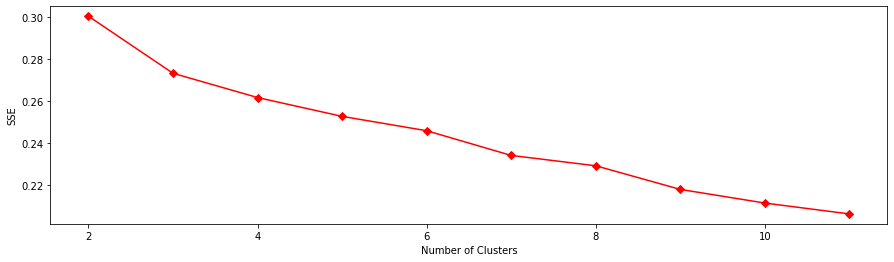

In [31]:
plt.figure(figsize=(15,4))
plt.plot(table.Cluster_Numbers,table.Error_Term,marker='D',color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [33]:
clusters = KMeans(7)
clusters.fit(final_df)
clusters.labels_
labels = clusters.predict(movements)
labels

array([1, 4, 4, 4, 1, 5, 5, 4, 3, 0, 1, 4, 1, 4, 1, 1, 0, 2, 1, 1, 6, 1,
       5, 5, 0, 5, 1, 6, 1, 6, 1, 1, 0, 6, 1, 2, 1, 2, 1, 1, 4, 4, 1, 1,
       1, 0, 4, 1, 1, 1, 4, 1, 1, 1, 6, 4, 1, 3, 0, 1])

In [43]:
clustered_result = pd.DataFrame({'labels':labels,'tickers':companies,'full-name':security,'sector':sector})
clustered_result.sort_values('labels')

,labels,tickers,full-name,sector
24,0,MO,Altria Group Inc,Consumer Staples
58,0,AVB,AvalonBay Communities,Real Estate
32,0,AMT,American Tower Corp.,Real Estate
16,0,ARE,Alexandria Real Estate Equities,Real Estate
45,0,AIV,Apartment Investment & Management,Real Estate
9,0,AES,AES Corp,Utilities
28,1,AAL,American Airlines Group,Industrials
30,1,AXP,American Express Co,Financials
31,1,AIG,American International Group,Financials
34,1,AMP,Ameriprise Financial,Financials


In [44]:
final_df['Cluster'] = clusters.labels_

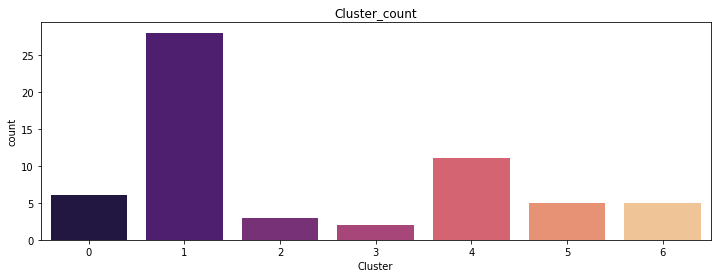

In [45]:
plt.figure(figsize=(12,4))
sns.countplot(x='Cluster',data=final_df,palette='magma')
plt.title('Cluster_count')
plt.show()